###**TOPT-AutoML(The Tree-Based Pipeline Optimization Tool)**

**The Tree-Based Pipeline Optimization Tool (TPOT)** was one of the very first AutoML methods and open-source software packages developed for the data science community.TPOT is an open-source library for performing AutoML in Python. It makes use of the popular Scikit-Learn machine learning library for data transforms and machine learning algorithms

1. **TPOT**is an open-source library for AutoML with scikit-learn data preparation and machine learning models.
2. How to use **TPOT to automatically** discover top-performing models for classification tasks.
3. How to use TPOT to automatically discover top-performing models for regression tasks.

In this notebook, I'm going to show how to use  the TOPT(automated) library to develop a classification model and regression model.

DATASET: https://raw.githubusercontent.com/KrishArul26/Data_set/main/Click%20_Buy.csv
More Information about dataset: https://www.kaggle.com/c/classification-data-challenge/overview


For more information about TOPT:https://lazypredict.readthedocs.io/en/latest/

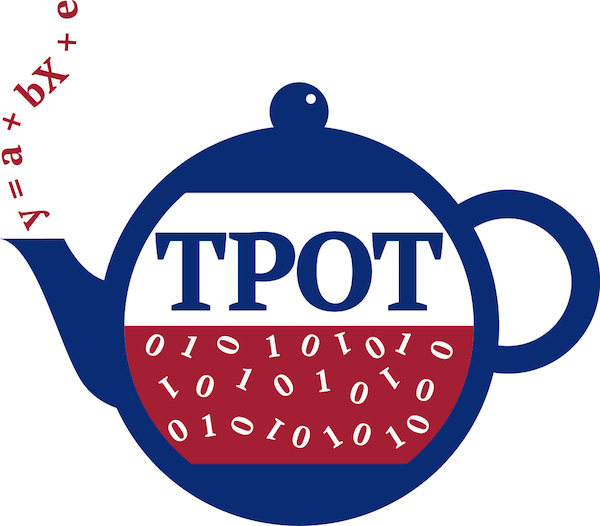

In [37]:
Image('tpot-logo.jpg',width=800)

Automated Machine Learning, often abbreviated as AutoML, is an emerging field in which the process of building machine learning models to model data is automated. AutoML has the capability to make modelling easier and more accessible for everyone.

### **TOPT**

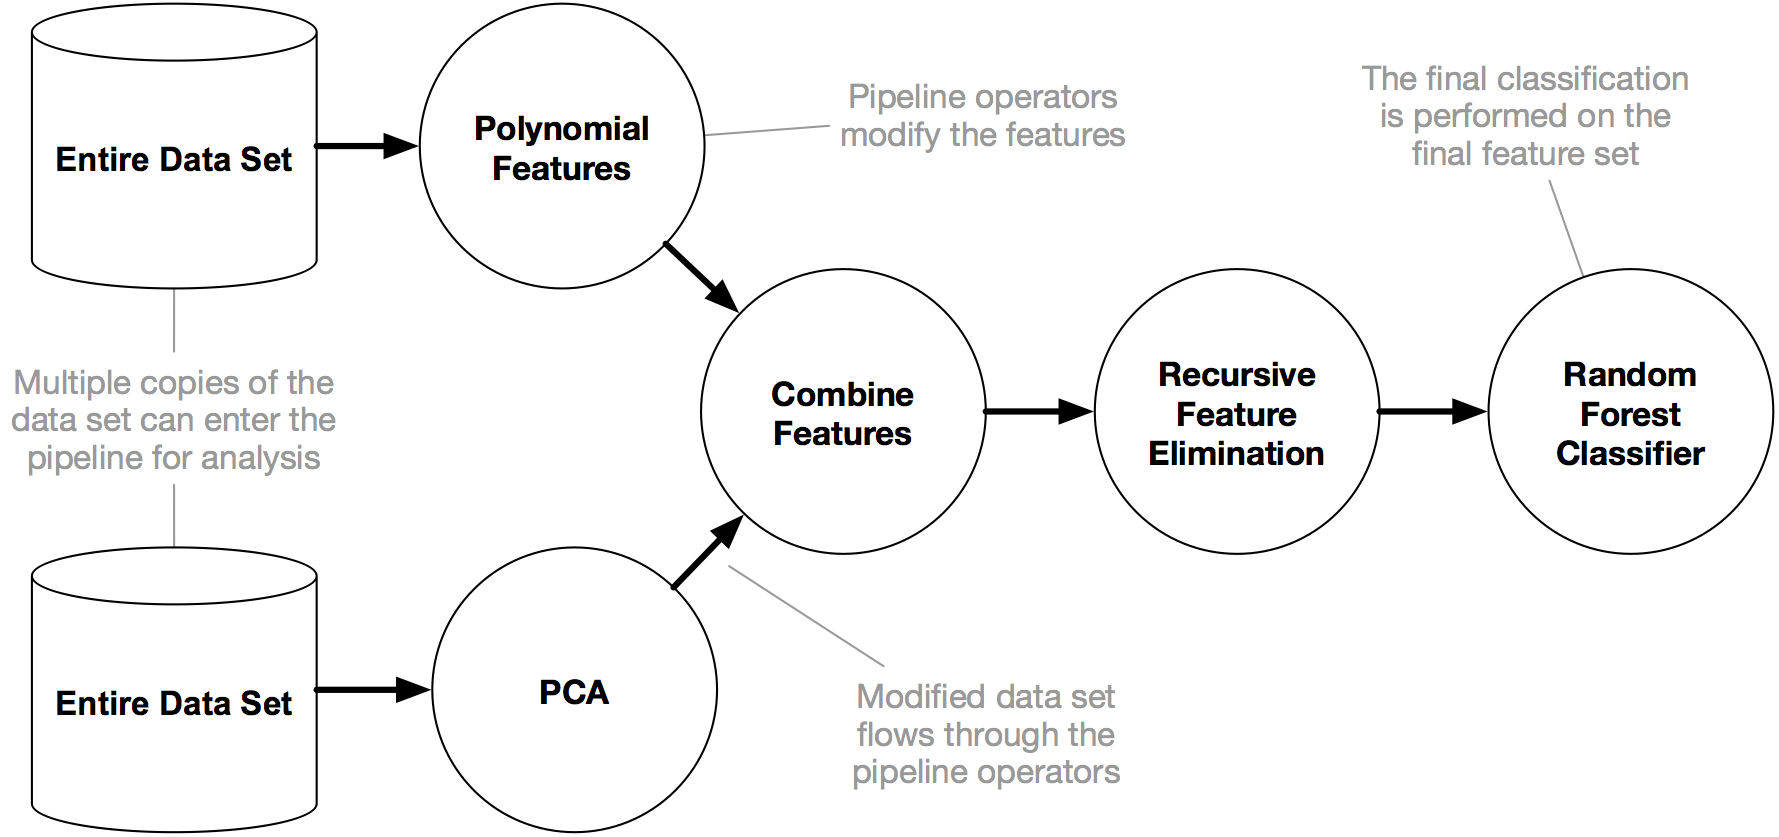

In [39]:
Image('tpot-pipeline-example.png',width=800)

TOPT helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

**It doesn't take care of NA values. So, we have to deal with NA values manually.**


In [ ]:

!pip install tpot


In [2]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### **Loading The Dataset**

In [3]:
import pandas as pd
import numpy as np

url="https://raw.githubusercontent.com/KrishArul26/Data_set/main/Click%20_Buy.csv"
buy= pd.read_csv(url,sep=",")

In [4]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      4107 non-null   int64
 1   V2      4107 non-null   int64
 2   V3      4107 non-null   int64
 3   V4      4107 non-null   int64
 4   V5      4107 non-null   int64
 5   V6      4107 non-null   int64
 6   V7      4107 non-null   int64
 7   V8      4107 non-null   int64
 8   V9      4107 non-null   int64
 9   V10     4107 non-null   int64
 10  V11     4107 non-null   int64
 11  V12     4107 non-null   int64
 12  V13     4107 non-null   int64
 13  V14     4107 non-null   int64
 14  V15     4107 non-null   int64
 15  V16     4107 non-null   int64
 16  V17     4107 non-null   int64
 17  V18     4107 non-null   int64
 18  V19     4107 non-null   int64
 19  V20     4107 non-null   int64
 20  V21     4107 non-null   int64
 21  V22     4107 non-null   int64
 22  V23     4107 non-null   int64
 23  V24     4107 

In [5]:
#Delete ID column
df=buy.drop('Id',axis=1)

In [6]:
df=df.iloc[1:1000,:]

In [7]:
df.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,...,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,39,2,3,2,9,2,2,0,5,7,2,0,0,3,6,0,4,5,0,0,0,4,1,5,0,1,4,5,0,6,3,8,0,1,9,0,4,3,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df['Buy'].value_counts()

0    935
1     64
Name: Buy, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


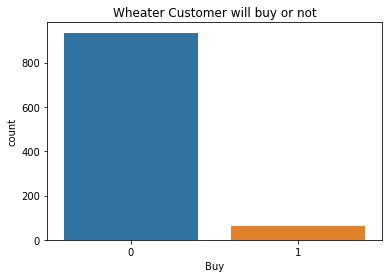

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Buy'])
plt.title("Wheater Customer will buy or not");

In [10]:
df.isnull().sum()

V2     0
V3     0
V4     0
V5     0
V6     0
      ..
V83    0
V84    0
V85    0
V86    0
Buy    0
Length: 86, dtype: int64

### **Train-Test Split**

In [11]:

from sklearn.model_selection import train_test_split


X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20,random_state =100)



### **Classification Probelms-TPOT Model building**

In [12]:
from tpot import  TPOTClassifier
tpot =  TPOTClassifier(generations=10, population_size=50, verbosity=3)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))




32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 71.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.941179245283019	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesC

In [14]:
print(tpot.score(X_test, y_test))


0.915


This lazypredictor used 26 algorithms to classified the dependent variables. We can see in the models So, now we  are going to select which are  algorithms have  accuracy above  95% 

In [16]:
tpot.export('tpot_digits_pipeline.py')

None


In [17]:

tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='entropy',
                                      max_depth=None,
                                      max_features=0.8500000000000001,
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=2, min_samples_split=12,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

#### Finally, We can know which is the best suitable algorithm for the problem then we can do manual hyperparameter tuning for that algorithm.

**Conclusion**

#### Finally, It automated library is very helpful to make a decision quickly and get the ideas which are the best suitable algorithm for classification problems or regressor problems. Further, we can do hyperparameter tunning manually. And find the best suitable parameters for each problem.